The task is to classify the reuters dataset into the categories attached to each document. As this is a very well used dataset, there are countless example datasets associated with various platforms. 

But as the assignment starts with "download the Reuters data set", I downloaded the various files locally and loaded the data into something that was usable for machine learning.


In [48]:
!ls -la data/reuters21578/*.sgm

-rw-r--r--@ 1 christina.jenkins  staff  1324350 Dec  4  1996 data/reuters21578/reut2-000.sgm
-rw-r--r--@ 1 christina.jenkins  staff  1254440 Dec  4  1996 data/reuters21578/reut2-001.sgm
-rw-r--r--@ 1 christina.jenkins  staff  1217495 Dec  4  1996 data/reuters21578/reut2-002.sgm
-rw-r--r--@ 1 christina.jenkins  staff  1298721 Dec  4  1996 data/reuters21578/reut2-003.sgm
-rw-r--r--@ 1 christina.jenkins  staff  1321623 Dec  4  1996 data/reuters21578/reut2-004.sgm
-rw-r--r--@ 1 christina.jenkins  staff  1388644 Dec  4  1996 data/reuters21578/reut2-005.sgm
-rw-r--r--@ 1 christina.jenkins  staff  1254765 Dec  4  1996 data/reuters21578/reut2-006.sgm
-rw-r--r--@ 1 christina.jenkins  staff  1256772 Dec  4  1996 data/reuters21578/reut2-007.sgm
-rw-r--r--@ 1 christina.jenkins  staff  1410117 Dec  4  1996 data/reuters21578/reut2-008.sgm
-rw-r--r--@ 1 christina.jenkins  staff  1338903 Dec  4  1996 data/reuters21578/reut2-009.sgm
-rw-r--r--@ 1 christina.jenkins  staff  1371071 Dec  4  1996 data/reut

21 files, each ~ the same size, except the last one which is ~ half the size. Now, how many have topics:

In [49]:
!grep \<TOPICS\>\<D\> data/reuters21578/*.sgm | wc -l


   11367


A substantial number! Great, let's load them. For this I created a parse class, and then a function to instantiate and run the class for all files within the data/reuters21578 folder. 

In [1]:
from reuters import load_data

df = load_data("data/reuters21578/")

data/reuters21578/reut2-004.sgm
data/reuters21578/reut2-010.sgm
data/reuters21578/reut2-011.sgm
data/reuters21578/reut2-005.sgm
data/reuters21578/reut2-013.sgm
data/reuters21578/reut2-007.sgm
data/reuters21578/reut2-006.sgm
data/reuters21578/reut2-012.sgm
data/reuters21578/reut2-016.sgm
data/reuters21578/reut2-002.sgm
data/reuters21578/reut2-003.sgm
data/reuters21578/reut2-017.sgm
Failed to read data/reuters21578/reut2-017.sgm as utf-8
Cannot find date patter in: 31-MAR-1987 605:12:19.12
data/reuters21578/reut2-001.sgm
data/reuters21578/reut2-015.sgm
data/reuters21578/reut2-014.sgm
data/reuters21578/reut2-000.sgm
data/reuters21578/reut2-019.sgm
data/reuters21578/reut2-018.sgm
data/reuters21578/reut2-020.sgm
data/reuters21578/reut2-008.sgm
data/reuters21578/reut2-009.sgm
data/reuters21578/reut2-021.sgm


Successfully loaded all the files except `data/reuters21578/reut2-017.sgm`, which if I had more time I would definitely investigate. But let's take a look at the data before I spend that time to see if I have a big enough sample size without it.

Since I was instructed to use the lewis_split for splitting training vs. testing, let's take a look at what kind of samples we're talking about within those parameters:


In [2]:
df.lewis_split.value_counts()

TRAIN       14668
TEST         6188
NOT-USED      722
Name: lewis_split, dtype: int64

Decent sample size, and note the 'NOT-USED' category. I will remove those while cleaning the data. 

In [3]:
df.head()

,old_id,new_id,has_topics,date,topics,places,people,orgs,exchanges,companies,title,dateline,body,author,cgi_split,lewis_split
0,8914,4001,True,1987-03-11 18:04:17.590,,canada,,,,,INCO SEES NO MAJOR IMPACT FROM DOW REMOVAL,"TORONTO, March 11 -",Inco Ltd said it did not expect its\nearlier r...,,TRAINING-SET,TRAIN
1,8915,4002,True,1987-03-11 18:06:47.220,,usa,,,,,FORMER EMPIRE OF CAROLINA <EMP> EXEC SENTENCED,"NEW YORK, March 11 -","Mason Benson, former president and\nchief oper...",,TRAINING-SET,TRAIN
2,8916,4003,True,1987-03-11 18:09:39.660,,usa,,,,,"DOCTORS FIND LINK BETWEEN AIDS, SMALLPOX VIRUS","BOSTON, March 11 -",In a discovery that could complicate the\nsear...,,TRAINING-SET,TRAIN
3,8917,4004,True,1987-03-11 18:13:59.930,,usa,,,,,BIRTH CONTROL PILLS HELP PREVENT CANCER - STUDY,"BOSTON, March 11 -",Doctors at the Centers for Disease\nControl in...,,TRAINING-SET,TRAIN
4,8918,4005,True,1987-03-11 18:14:49.930,interest,usa,,,,,U.S. ECONOMIC DATA KEY TO DEBT FUTURES OUTLOOK,"CHICAGO, March 11 -",U.S. economic data this week could be\nthe key...,"By Brad Schade, Reuters",TRAINING-SET,TRAIN


Because I am using TOPICS as the target, which it turns out is not present for every article:

In [4]:
df.topics.value_counts()

             10211
earn          3972
acq           2423
money-fx       682
crude          543
             ...  
soy-meal         1
tapioca          1
fishmeal         1
saudriyal        1
hk               1
Name: topics, Length: 83, dtype: int64

To the tune of 10211 articles. But, as including them adds nothing (without doing some imputation that I wish I had more time for). 

It's also notable that the dataset is very imbalanced, which can be tricky for multi-label classification. To offset some of this, I only use topics that are used more than 100 times. This is an entirely arbitrary cutoff to simplify this case study. If this were a real life work assignment, I would consult my stakeholders about whether all the topics were important, or whether this cutoff is appropriate. 

In [3]:
df[(df.lewis_split != 'NOT-USED') & 
    (df.groupby('topics').topics.transform('count')>100) & 
   (df.topics != '')].lewis_split.value_counts()


TRAIN    6858
TEST     2634
Name: lewis_split, dtype: int64

In [4]:
df[(df.lewis_split != 'NOT-USED') & 
    (df.groupby('topics').topics.transform('count')>100) & 
   (df.topics != '')].lewis_split.shape

(9492,)

I recently did some research on sample size and various ml algorithms and to my surprise, most of them fair fine with 9000 samples (I assumed the threshold would be much higher). I think I'm ok to proceed. 

In [5]:
df[(df.lewis_split != 'NOT-USED') & 
    (df.groupby('topics').topics.transform('count')>100) & 
   (df.topics != '')].topics.value_counts()

earn            3950
acq             2347
money-fx         628
grain            499
crude            491
trade            424
interest         319
ship             193
money-supply     164
sugar            133
coffee           122
gold             114
gnp              108
Name: topics, dtype: int64

I've also reduced the number of topics to 13, and still have imbalanced data. But with text data, which usually has a fairly broad feature space, this shouldn't be problematic. 

In [5]:
from clean_data import setup_split_data

train_data, test_data = setup_split_data(df)

Using TensorFlow backend.


## Simple network approach

I have been playing around with neural networks lately. This assignment seemed like a great time to stretch my legs and try those techniques out. 

First I need to transform the data. 

In [11]:
train_labels_encoded, test_labels_encoded = map_topics(train_data, test_data)


In [22]:
xt_train, xt_test, t = tokenize_data(train_data, test_data)

/Users/christina.jenkins/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/christina.jenkins/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [25]:
xt_test.shape

(2634, 10000)

In [26]:
from classifier import compile_model

clf = compile_model()


In [28]:
x_val = xt_train[:1000]
partial_x_train = xt_train[1000:]

y_val = train_labels_encoded[:1000]
partial_y_train = train_labels_encoded[1000:]

In [13]:

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(13, activation='softmax'))
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [30]:
results = clf.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   validation_data=(x_val,y_val))


Train on 5858 samples, validate on 1000 samples
Epoch 1/20
5858/5858 [==============================] - 1s 167us/step - loss: 0.5668 - accuracy: 0.8628 - val_loss: 0.3002 - val_accuracy: 0.9430
Epoch 2/20
5858/5858 [==============================] - 1s 109us/step - loss: 0.0948 - accuracy: 0.9764 - val_loss: 0.3314 - val_accuracy: 0.9380
Epoch 3/20
5858/5858 [==============================] - 1s 110us/step - loss: 0.0496 - accuracy: 0.9867 - val_loss: 0.3568 - val_accuracy: 0.9400
Epoch 4/20
5858/5858 [==============================] - 1s 104us/step - loss: 0.0371 - accuracy: 0.9896 - val_loss: 0.4968 - val_accuracy: 0.9320
Epoch 5/20
5858/5858 [==============================] - 1s 109us/step - loss: 0.0347 - accuracy: 0.9906 - val_loss: 0.5810 - val_accuracy: 0.9270
Epoch 6/20
5858/5858 [==============================] - 1s 116us/step - loss: 0.0287 - accuracy: 0.9904 - val_loss: 0.5452 - val_accuracy: 0.9340
Epoch 7/20
5858/5858 [==============================] - 1s 110us/step - loss

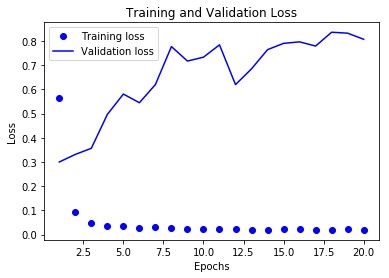

In [32]:
import matplotlib.pyplot as plt

loss = results.history['loss']
val_loss = results.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

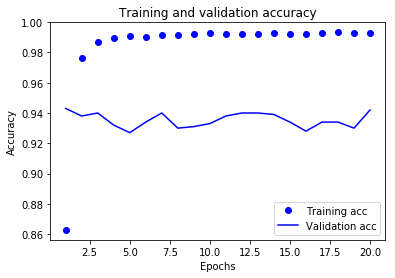

In [34]:
plt.clf()
acc = results.history['accuracy']
val_acc = results.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [36]:
clf.evaluate(xt_test, test_labels_encoded)

2634/2634 [==============================] - 0s 71us/step


[0.9509661002921265, 0.9244495034217834]

## Simple sklean pipeline

In [27]:
from nltk.corpus import reuters
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
reuters.categories()

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee',
 'copper',
 'copra-cake',
 'corn',
 'cotton',
 'cotton-oil',
 'cpi',
 'cpu',
 'crude',
 'dfl',
 'dlr',
 'dmk',
 'earn',
 'fuel',
 'gas',
 'gnp',
 'gold',
 'grain',
 'groundnut',
 'groundnut-oil',
 'heat',
 'hog',
 'housing',
 'income',
 'instal-debt',
 'interest',
 'ipi',
 'iron-steel',
 'jet',
 'jobs',
 'l-cattle',
 'lead',
 'lei',
 'lin-oil',
 'livestock',
 'lumber',
 'meal-feed',
 'money-fx',
 'money-supply',
 'naphtha',
 'nat-gas',
 'nickel',
 'nkr',
 'nzdlr',
 'oat',
 'oilseed',
 'orange',
 'palladium',
 'palm-oil',
 'palmkernel',
 'pet-chem',
 'platinum',
 'potato',
 'propane',
 'rand',
 'rape-oil',
 'rapeseed',
 'reserves',
 'retail',
 'rice',
 'rubber',
 'rye',
 'ship',
 'silver',
 'sorghum',
 'soy-meal',
 'soy-oil',
 'soybean',
 'strategic-metal',
 'sugar',
 'sun-meal',
 'sun-oil',
 'sunseed',
 'tea',
 'tin',
 'trade',
 'veg-oil',
 'wheat',
 'wpi',
 'yen',
 'zinc']

In [40]:
stop_words = stopwords.words("english")
vectorizer = TfidfVectorizer(stop_words=stop_words)
mlb = MultiLabelBinarizer()

In [43]:
documents = reuters.fileids()
train = [d for d in documents if d.startswith("training/")]


In [44]:
docs = {}
docs["train"] = [reuters.raw(doc_id) for doc_id in train]
# docs["test"] = [reuters.raw(doc_id) for doc_id in test]
# xs = {"train": [], "test": []}
# xs["train"] = vectorizer.fit_transform(docs["train"]).toarray()
# xs["test"] = vectorizer.transform(docs["test"]).toarray()
# ys = {"train": [], "test": []}
# ys["train"] = mlb.fit_transform([reuters.categories(doc_id) for doc_id in train])
# ys["test"] = mlb.transform([reuters.categories(doc_id) for doc_id in test])
# data = {
#     "x_train": xs["train"],
#     "y_train": ys["train"],
#     "x_test": xs["test"],
#     "y_test": ys["test"],
#     "labels": globals()["labels"],
# }
# data

In [45]:
docs

{'train': ['BAHIA COCOA REVIEW\n  Showers continued throughout the week in\n  the Bahia cocoa zone, alleviating the drought since early\n  January and improving prospects for the coming temporao,\n  although normal humidity levels have not been restored,\n  Comissaria Smith said in its weekly review.\n      The dry period means the temporao will be late this year.\n      Arrivals for the week ended February 22 were 155,221 bags\n  of 60 kilos making a cumulative total for the season of 5.93\n  mln against 5.81 at the same stage last year. Again it seems\n  that cocoa delivered earlier on consignment was included in the\n  arrivals figures.\n      Comissaria Smith said there is still some doubt as to how\n  much old crop cocoa is still available as harvesting has\n  practically come to an end. With total Bahia crop estimates\n  around 6.4 mln bags and sales standing at almost 6.2 mln there\n  are a few hundred thousand bags still in the hands of farmers,\n  middlemen, exporters and proc